In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1000000000, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Equities', 'Foreign') + ['VT', 'ACWI'], 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-22 to 2019-07-05 - 77


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

17


,len,mean,std,shrp,drawdown
Symbols,,,,,
EWL,32,3.688399,2.366374,1.488240,3.113807
RSX,32,6.034917,4.206404,1.395075,5.962674
EWA,32,3.061939,2.126615,1.361446,3.321207
EFAV,32,2.077192,1.939525,0.985048,2.819624
EWZ,32,6.194062,6.159703,0.978520,10.630581
INDA,32,2.028361,2.814552,0.661453,8.150650
VIGI,32,2.116136,3.276521,0.594981,4.587566
ILF,32,3.138183,5.727889,0.518780,10.404973
EPI,32,1.543556,2.807631,0.490410,8.244274


evicted EWZ 0.8859022115986501
retry backlogs ['GSIE', 'DEM', 'INDA', 'ILF', 'RODM', 'FNDE', 'VIGI', 'FEZ', 'EPP', 'EWC', 'EFG', 'EFAV'] at 0.96
evicted EPP 0.9479807628438415
evicted EFAV 0.9562575842980758
evicted ILF 0.9569809473109008
retry backlogs ['GSIE', 'DEM', 'FEZ', 'RODM', 'FNDE', 'VIGI', 'INDA', 'EWC', 'EFG'] at 0.97
evicted EFG 0.9179610833344191
evicted EWA 0.9075387201730212
retry backlogs ['GSIE', 'DEM', 'FEZ', 'RODM', 'FNDE', 'VIGI', 'EWC', 'EPI'] at 0.98
evicted RODM 0.9784589304370457
evicted EWC 0.856697409692693
retry backlogs ['FEZ', 'DEM', 'FNDE', 'VIGI', 'EPI', 'GSIE'] at 0.99
evicted FNDE 0.9821644556079243
evicted VIGI 0.9840907658092787
evicted FEZ 0.9039072768579306
retry backlogs ['DEM', 'EPI', 'GSIE'] at 1.0
evicted DEM 0.9682640247742381
evicted EPI 0.9904015096392774
evicted GSIE 0.9097347408624206
{'EWL': 0.72, 'INDA': 0.17, 'RSX': 0.11}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,3.653051,2.289780,-0.416678,1.454646,4.654084,5.398221,7.099476,1.522585,4.086821
EWL,32.0,3.688399,2.366374,-0.581545,1.290517,4.554855,5.648292,6.313994,1.488240,3.113807
RSX,32.0,6.034917,4.206404,-1.866181,2.091687,8.001234,9.049119,11.407202,1.395075,5.962674
INDA,32.0,2.028361,2.814552,-0.884148,-0.178651,0.765776,4.090940,9.302329,0.661453,8.150650


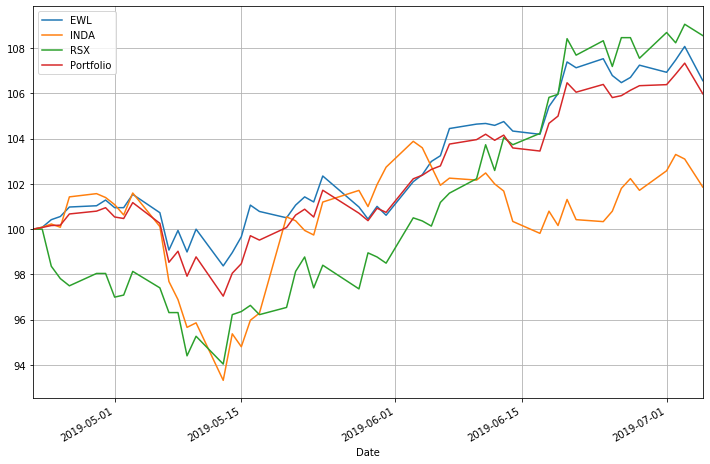

In [4]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)